Importamos las funciones requeridas.

In [2]:
import sys
import os
from math import sin, cos, pi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from generator import generate
from runner import correr_instancia
from isotherm import isotherm_abs, isotherm_linear
from risk import run_risks
from graph  import read_input, temp_graph, temp_graph_bilin, iso_graph, risk_graph

Experimento 4.3.3 picos con $p$ creciente.

Generamos las instancias

In [ ]:
instancia = f'picos/p'
for p in [n for n in list(range(1, 11))]:
    generate(instancia, f"picos_{p}", 2, 10, 20, 180, 500, 1, [lambda t : 1500], [lambda t, p=p : ((((sin(t)+1)/2)**p)*500)])


Resolvemos las instancias

In [ ]:
distribucion = 'picos'
instancia = f'{distribucion}/p'
for n in list(range(1, 2)):
    correr_instancia('temperatura', instancia, f'picos_{n}', 'LU')
    isotherm_lin('picos/p', f'picos_{n}')

In [ ]:
for n in range(1, 11):
    iso_graph('picos/p', f'picos_{n}')

Graficamos

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
sns.set_theme()
instance = 'picos/p'
r_i, R_e, m, n, iso, ninst = read_input(instance, 'picos_1')
theta = np.linspace(0, 2*np.pi, n+1)
plt.ylim(r_i, R_e+0.1)
ax.set_rticks([x-1 for x in range(int(r_i)-1, int(R_e)+1)])
ax.plot(theta, [r_i]*(n+1), 'grey', label = '$r_i$')
ax.grid(True)


clr = ['', 'c-', '--', '', '', 'm-.', '', '', '', '', 'r-']
for p in [1, 2, 5, 10]:
    subinstance = f'picos_{p}'
    r_i, R_e, m, n, iso, ninst = read_input(instance, subinstance)
    values = [float(line.strip()) for line in open(f'../../output/{instance}/{subinstance}.iso')]
    r = np.array([ values + [values[0]] ]).reshape(-1, 1)
    ax.plot(theta, r, clr[p], label = f"p = {p}")
plt.legend(loc=(-.4, 0.775))
plt.savefig('picos_iso.pdf', bbox_inches='tight')

       valor   p método
0   0.695210   1    avg
1   1.000000   1    abs
2   0.638514   2    avg
3   1.000000   2    abs
4   0.610578   3    avg
5   1.000000   3    abs
6   0.593001   4    avg
7   1.000000   4    abs
8   0.580509   5    avg
9   1.000000   5    abs
10  0.570942   6    avg
11  1.000000   6    abs
12  0.563256   7    avg
13  1.000000   7    abs
14  0.556800   8    avg
15  1.000000   8    abs
16  0.551194   9    avg
17  1.000000   9    abs
18  0.546187  10    avg
19  1.000000  10    abs


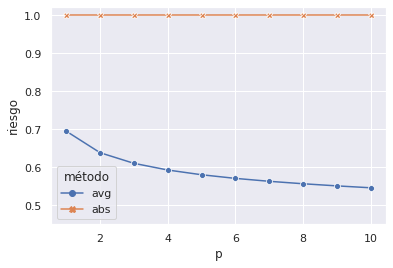

In [3]:
distribucion = 'picos'
instancia = f'{distribucion}/p'
path_tiempos = f"../../output/{instancia}/"
datapoints = []
riesgos = pd.DataFrame([])  
for p in range(1, 11):
    run_risks(instancia, f'picos_{p}')
    n_riesgos = pd.read_csv('../../output/'+instancia+f'/{distribucion}_{p}.risk')
    n_riesgos['p'] = p
    n_riesgos['método'] = ['avg', 'abs']
    riesgos = pd.concat([riesgos, n_riesgos], axis=0).drop_duplicates().reset_index(drop=True)

sns.set_theme()

print(riesgos)

ax = sns.lineplot(
    data=riesgos,
    x='p', y='valor', hue='método', style='método',
    markers=True, dashes=False
)

ax.set(xlabel='p', ylabel='riesgo')
plt.ylim(0.45)
#plt.yscale('log')
plt.savefig('picos_riesgo.pdf')